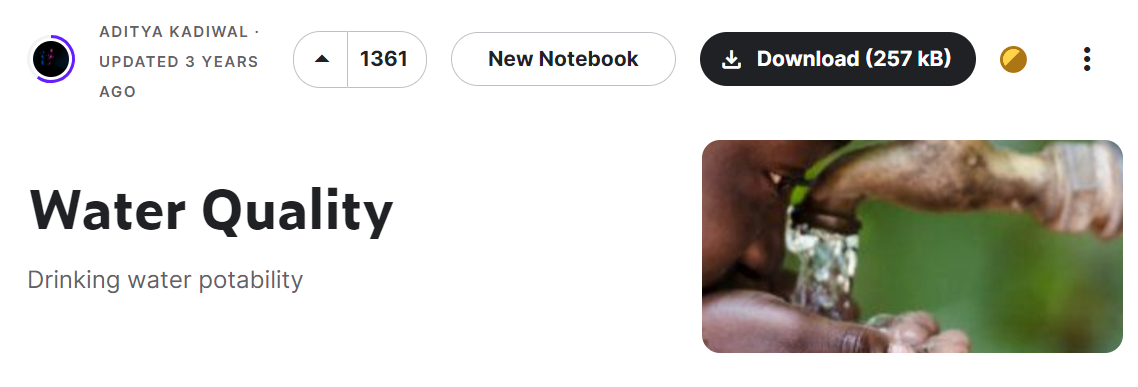

**Content:**

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

Features:
1. pH value

2. Hardness

3. Solids (Total dissolved solids - TDS)

4. Chloramines

5. Sulfate

6. Conductivity

7. Organic_carbon

8. Trihalomethanes

9. Turbidity

10. Potability

The goal is to judge potablility using 9 features. MLP classification was used through pytorch.

------------------------------

# Midterm Project [헤나 포르투스]
- Neural Network Loss 0.592
- Neural Network Accuary: 0.408

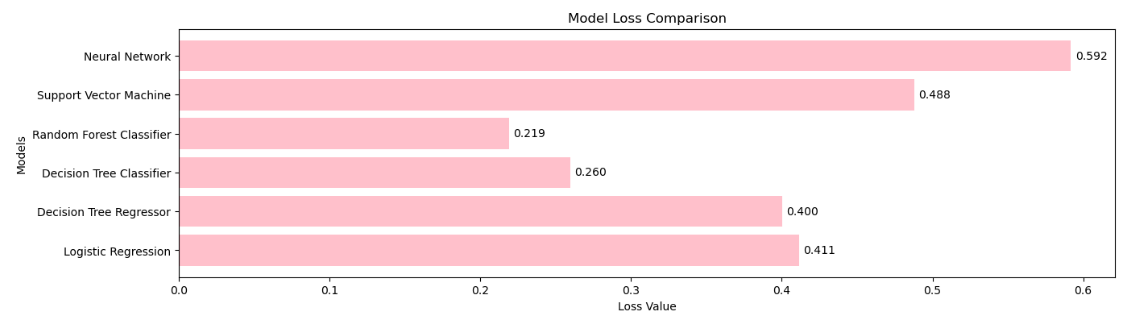

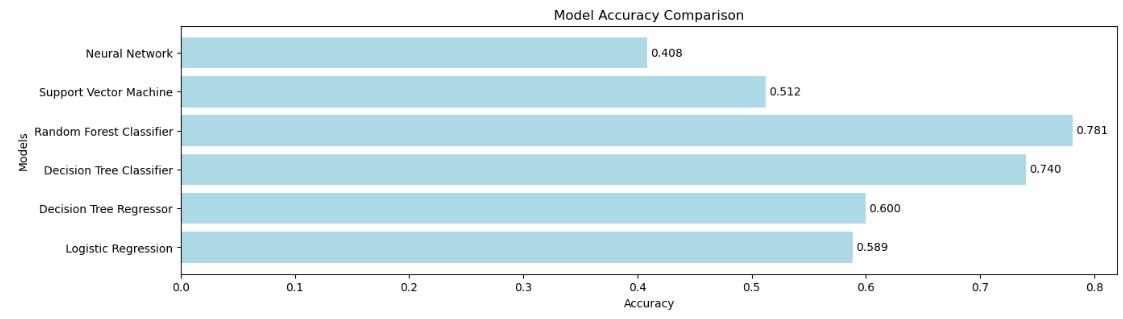


- criterion = MSELoss()
- optimizer= Adam(lr=0.001)
- hidden_layer_sizes=1000
- activation='relu'

--------------------------------------------

# Data Reading and Data Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy.stats import ttest_ind
from statistics import mean,variance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader
data = pd.read_csv("/content/drive/MyDrive/water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
data.duplicated().value_counts()

False    3276
dtype: int64

Missing value counts.

In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

ph, Sulfate, Trihalomethanes columns contains null values.

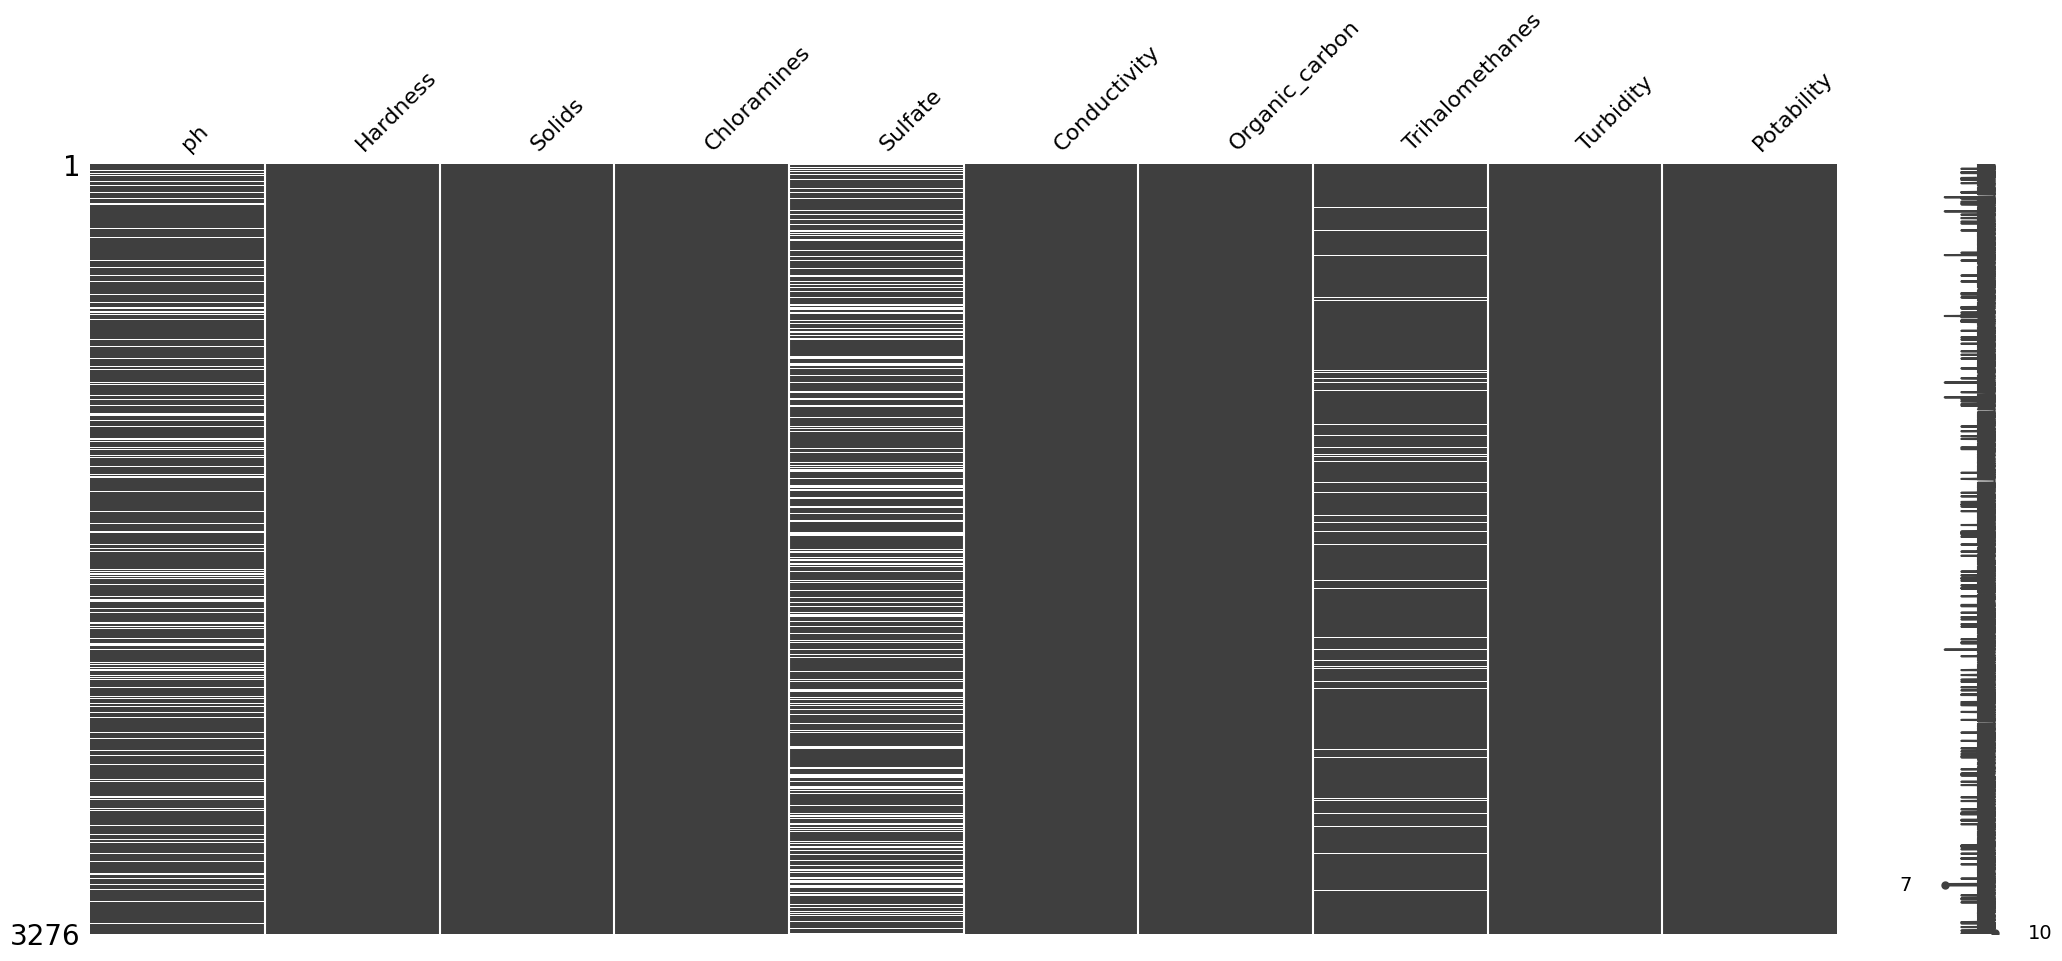

<Figure size 1000x600 with 0 Axes>

In [5]:
import missingno as msno
msno.matrix(data)
plt.figure(figsize=(10,6))
plt.show()

This one-liner fills missing values in columns 'ph', 'Sulfate', and 'Trihalomethanes' of the 'data' DataFrame by replacing them with the group-wise mean values based on the 'Potability' column.

In [6]:
fill_columns = ['ph', 'Sulfate', 'Trihalomethanes']
data[fill_columns] = data.groupby('Potability')[fill_columns].transform(lambda x: x.fillna(x.mean()))

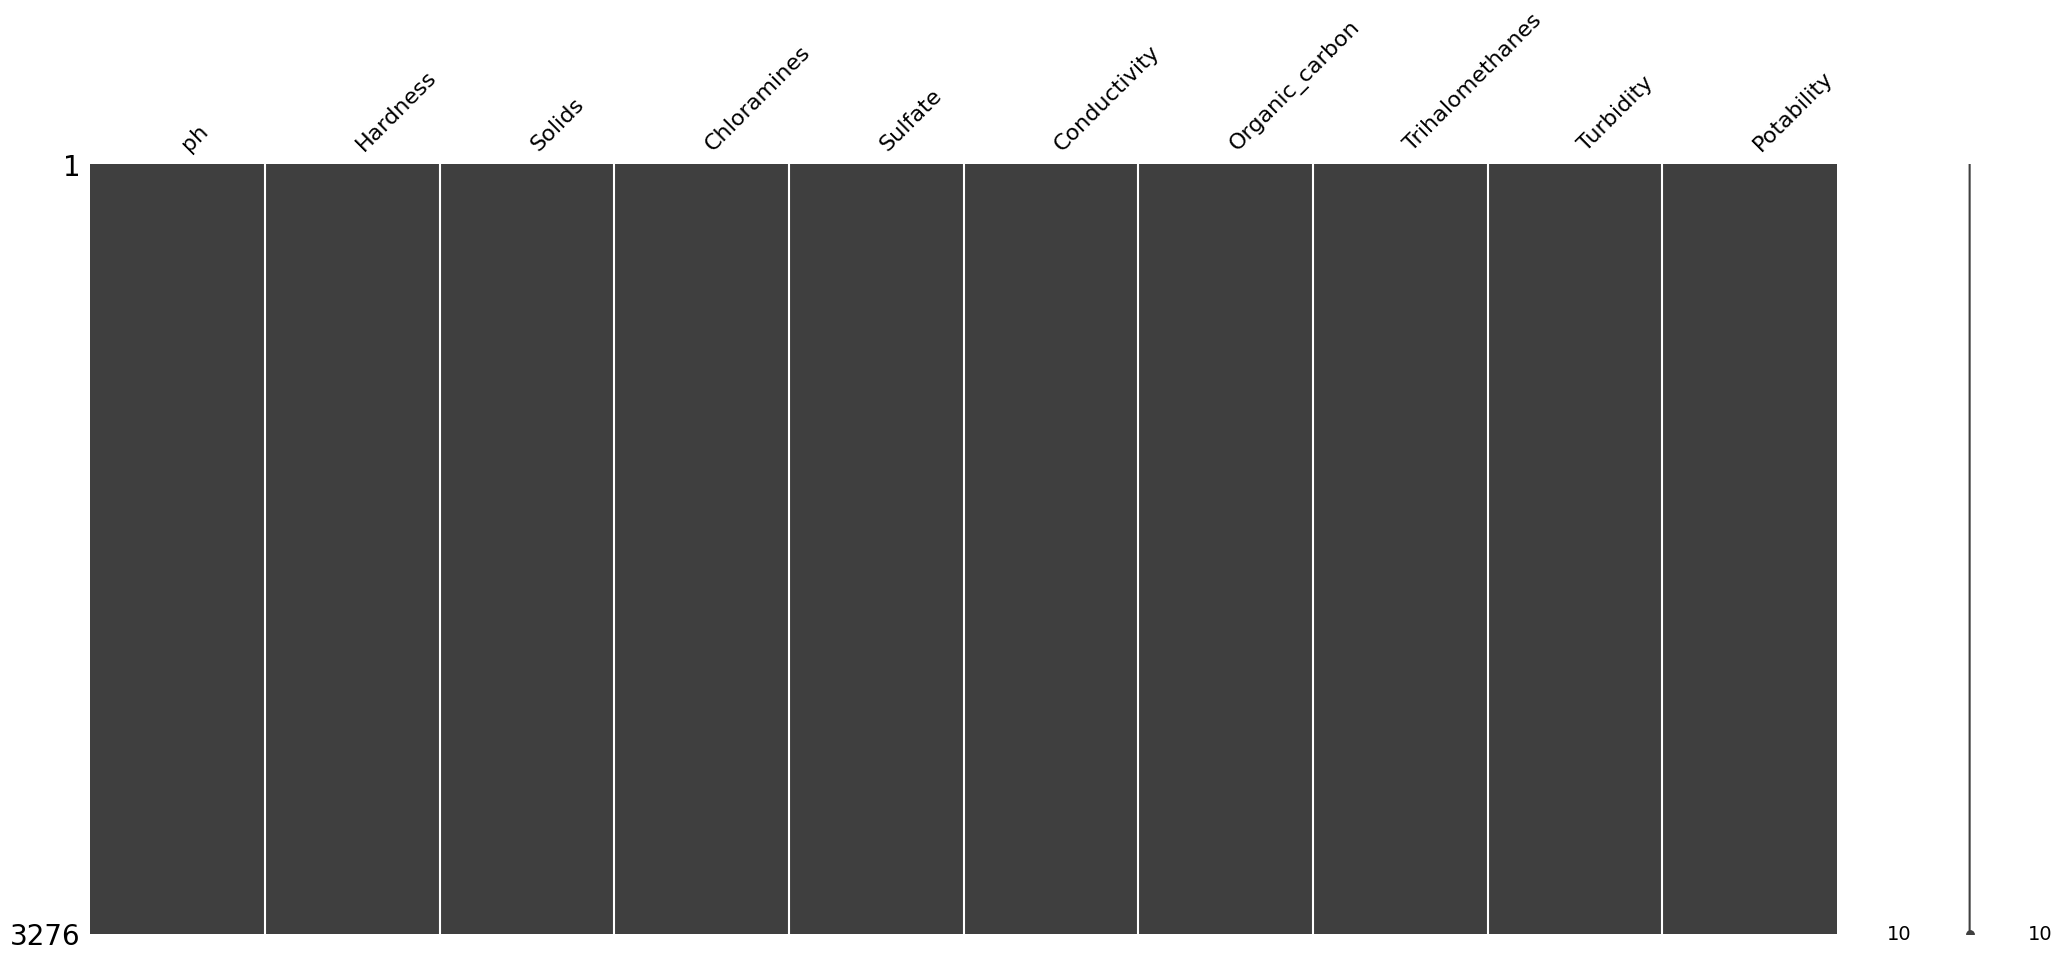

<Figure size 1000x600 with 0 Axes>

In [7]:
import missingno as msno
msno.matrix(data)
plt.figure(figsize=(10,6))
plt.show()

Dataset is not in perfect balance.

- Not Potable 60.99%
- Potable 39.01%

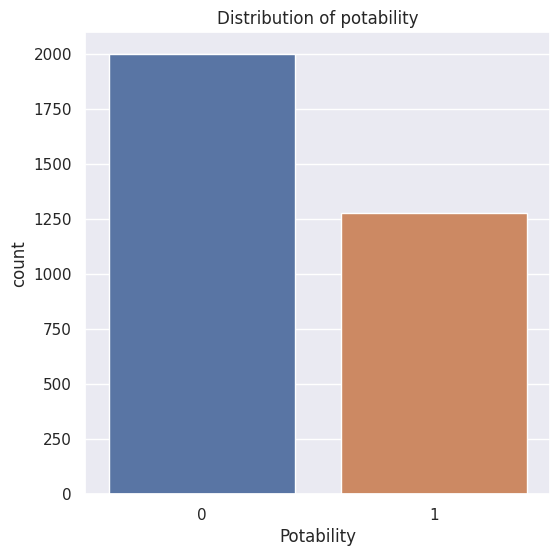

In [8]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = data['Potability'])
plt.title('Distribution of potability')
plt.show()

# Train&Test split

In [9]:
X=data.drop(['Potability'],axis=1)
Y = data.iloc[:, -1]
tr_x, ts_x,tr_y,ts_y = train_test_split(X,Y, test_size = 0.2,random_state=1122)

In [70]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658


In [11]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [71]:
tr_y
# random data

,Potability
2696,0
2752,1
2568,0
1426,0
1889,0
...,...
3011,0
415,0
1481,1
2285,0



Each feature is transformed to be precisely positioned between 0 and 1. Therefore, the minimum value becomes 0, the maximum value becomes 1, and the values in between are linearly scaled proportionally.

In [12]:
scaler = MinMaxScaler()
tr_x = scaler.fit_transform(tr_x)
ts_x= scaler.transform(ts_x)

- X data 는 전체 data에서  'Potability' 열을 삭제하였습니다. (Y data를 Potability로 두고 분류하기 위해서) 학습과정에서 중요도가 떨어지거나 연관이 없는 열이 있다면 추가로 삭제하기 위해 수업시간에 다뤘던 Decision Tree, Logistic Regression, SVC를 사용하여 학습에서 각 변수가 끼치는 중요도를 시각화하였습니다.  그러나 아래와 같이 각 알고리즘마다 Feature Importance의 순위가 달랐습니다.  그렇기에 9개의 값들(ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity)을 모두 남겨두었습니다.

- X data has been obtained by removing the 'Potability' column from the entire dataset (for classifying using 'Potability' as the Y data). During the training process, we visualized the importance of each variable using Decision Tree, Logistic Regression, and SVC, which were covered in the class, with the intention of further removing columns with low importance or no correlation. However, as shown below, the ranking of Feature Importance varied for each algorithm. Therefore, all nine values (ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity) were retained.

- "X data"是通过从整个数据集中删除"Potability"列获得的（以'Potability'作为Y数据进行分类）。在训练过程中，我们使用在课堂上讲解过的Decision Tree、Logistic Regression和SVC可视化了每个变量的重要性，以进一步删除重要性较低或不相关的列。然而，如下所示，每个算法的Feature Importance排名都有所不同。因此，保留了所有九个值（ph、Hardness、Solids、Chloramines、Sulfate、Conductivity、Organic_carbon、Trihalomethanes、Turbidity）。

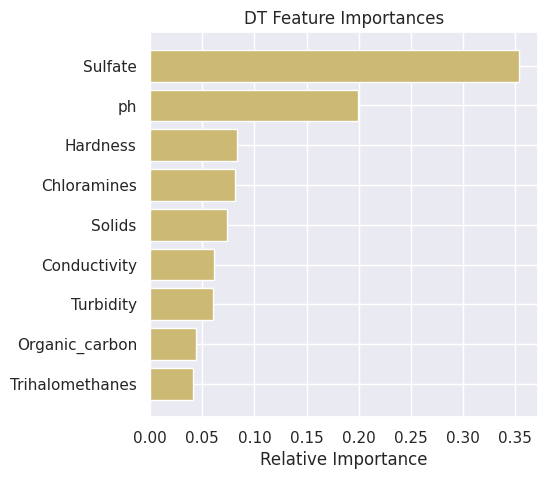

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(tr_x,tr_y)
feature_names=X.columns.tolist()
features = feature_names
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('DT Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

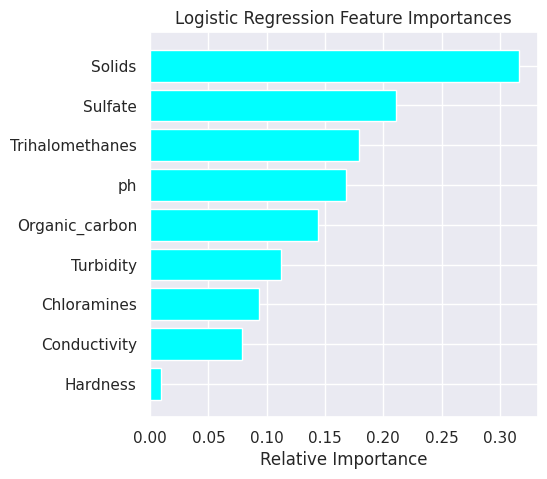

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(tr_x, tr_y)

importances_lr = lr.coef_[0]
indices_lr = np.argsort(np.abs(importances_lr))

plt.figure(figsize=(5, 5))
plt.title('Logistic Regression Feature Importances')
plt.barh(range(len(indices_lr)), np.abs(importances_lr[indices_lr]), color='cyan')
plt.yticks(range(len(indices_lr)), [features[i] for i in indices_lr])
plt.xlabel('Relative Importance')
plt.show()


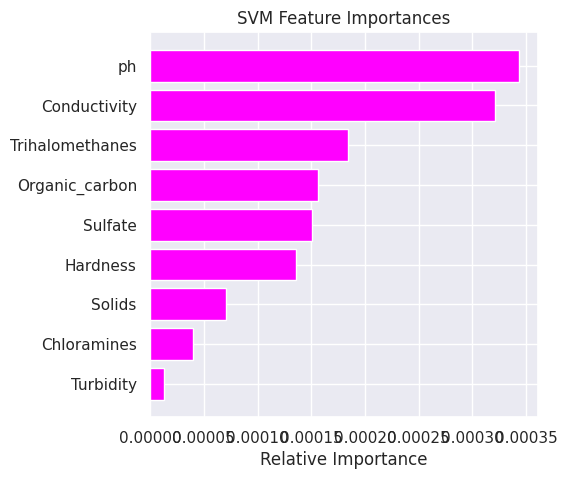

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(tr_x, tr_y)

importances_svm = np.abs(svm.coef_[0])
indices_svm = np.argsort(importances_svm)

plt.figure(figsize=(5, 5))
plt.title('SVM Feature Importances')
plt.barh(range(len(indices_svm)), importances_svm[indices_svm], color='magenta')
plt.yticks(range(len(indices_svm)), [features[i] for i in indices_svm])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
batch_size = 16
tr_y, ts_y = tr_y.to_frame(),ts_y.to_frame()

In [17]:
class trainData(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(np.array(tr_x)),
                       torch.FloatTensor(tr_y.values.flatten()))

class testData(Dataset):

    def __init__(self, X_data):
        self.X_data = X_data

    def __getitem__(self, index):
        return self.X_data[index]

    def __len__ (self):
        return len(self.X_data)


test_data = testData(torch.FloatTensor(ts_x))

In [18]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size)

# Model

BCEWithLogitsLoss( ) = Sigmoid + BCELoss( )

- nn.BCEWithLogitsLoss( )를 사용했기 때문에 sigmoid를 출력층에 넣지 않았습니다. 일반적으로 nn.BCEWithLogitsLoss( )가 nn.BCELoss( )보다 조금 더 안정적이라고 합니다.
- I used nn.BCEWithLogitsLoss(), so I didn't include sigmoid in the output layer. Generally, nn.BCEWithLogitsLoss( ) is considered slightly more stable than nn.BCELoss
- 我使用了nn.BCEWithLogitsLoss( )，因此在输出层没有使用sigmoid。通常认为nn.BCEWithLogitsLoss( )比nn.BCELoss( )稍微更稳定。

In [19]:
class MLP_layer_4(nn.Module):

    def __init__(self,inp_dim,layer1_dim,layer2_dim,layer3_dim,output_dim):
        super().__init__()
        self.fc1 = nn.Linear(inp_dim, layer1_dim)
        self.fc2 = nn.Linear(layer1_dim,layer2_dim)
        self.fc3 = nn.Linear(layer2_dim, layer3_dim)
        self.fc4 = nn.Linear(layer3_dim, output_dim)

    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = torch.relu(self.fc2(out))
        out = torch.relu(self.fc3(out))
        out = torch.relu(self.fc4(out))
        return out

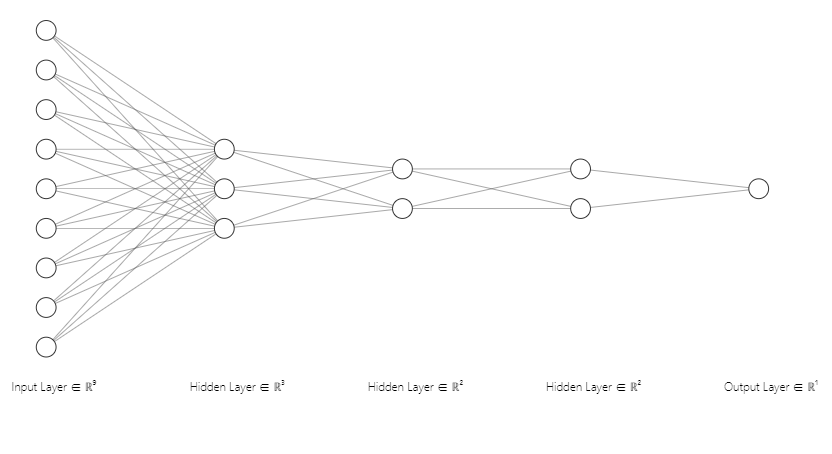

**Input** =  ph, Hardness, Solids, Chloramines,Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity

**Output** = Potable or Not Potable(1 or 0)


In [20]:
input_size = 9
layer1_dim = 3
layer2_dim = 2
layer3_dim = 2
output_size = 1
model_layer_4 =MLP_layer_4(input_size,layer1_dim,layer2_dim,layer3_dim, output_size)

print(model_layer_4)

MLP_layer_4(
  (fc1): Linear(in_features=9, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=2, bias=True)
  (fc4): Linear(in_features=2, out_features=1, bias=True)
)


In [21]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)

    return acc

In [22]:
epochs=3000

criterion=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(params=model_layer_4.parameters(),lr=0.0001)

The effect of batch size on the generalizability of the convolutional neural networks on a histopathology dataset

- 이 논문에서 Batch size가 16일때 Adam LR=0.0001인 경우가 가장 성능이 좋다고 하여 0.0001로 설정하였습니다. 사실 학습 환경과 데이터가 다르기 때문에 논문의 결과가 답은 아니지만 발표를 듣는 분들께서도 알아두시면 좋을 것 같아 첨부해보았습니다
- In this paper, the performance was best when the batch size was 16 and the Adam learning rate was 0.0001. Actually, since the training environment and data are different, the results of the paper may not be entirely accurate. However, I thought it would be helpful for those listening to the presentation, so I attached it
- 在这篇论文中，当批处理大小为16且Adam学习速率为0.0001时，性能最佳。实际上，由于训练环境和数据不同，论文的结果可能并不完全准确。然而，我认为对于听演示的人们来说，这可能会有所帮助，所以我附上了。

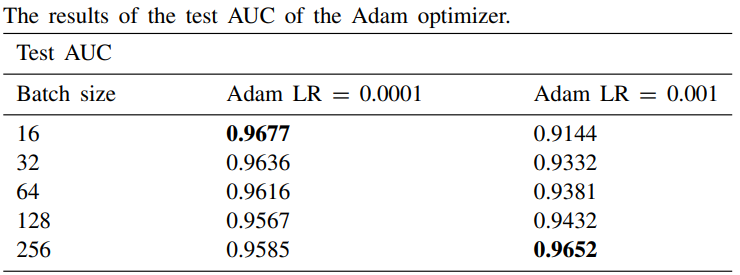

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using: ",device)

Using:  cpu


# Train Model

In [24]:
model_layer_4.train()
epoch_loss_list = []
epoch_acc_list = []
for e in range(1, epochs+1):
    epoch_loss = 0
    epoch_acc = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_batch = y_batch.view(-1, 1).float()
        y_pred = model_layer_4(X_batch)
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    epoch_loss_list.append(epoch_loss/len(train_loader))
    epoch_acc_list.append(epoch_acc/len(train_loader))

    if e % 200 == 0:
        print(f'Model: MLP_layer_4 | Epoch {e:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')


Model: MLP_layer_4 | Epoch 200: | Loss: 0.69292 | Acc: 61.189
Model: MLP_layer_4 | Epoch 400: | Loss: 0.69192 | Acc: 61.652
Model: MLP_layer_4 | Epoch 600: | Loss: 0.68907 | Acc: 62.988
Model: MLP_layer_4 | Epoch 800: | Loss: 0.68641 | Acc: 63.555
Model: MLP_layer_4 | Epoch 1000: | Loss: 0.68518 | Acc: 64.073
Model: MLP_layer_4 | Epoch 1200: | Loss: 0.68451 | Acc: 64.305
Model: MLP_layer_4 | Epoch 1400: | Loss: 0.68403 | Acc: 64.268
Model: MLP_layer_4 | Epoch 1600: | Loss: 0.68376 | Acc: 64.073
Model: MLP_layer_4 | Epoch 1800: | Loss: 0.68376 | Acc: 64.384
Model: MLP_layer_4 | Epoch 2000: | Loss: 0.68369 | Acc: 64.232
Model: MLP_layer_4 | Epoch 2200: | Loss: 0.68349 | Acc: 64.445
Model: MLP_layer_4 | Epoch 2400: | Loss: 0.68355 | Acc: 64.451
Model: MLP_layer_4 | Epoch 2600: | Loss: 0.68350 | Acc: 64.634
Model: MLP_layer_4 | Epoch 2800: | Loss: 0.68329 | Acc: 64.640
Model: MLP_layer_4 | Epoch 3000: | Loss: 0.68306 | Acc: 64.494


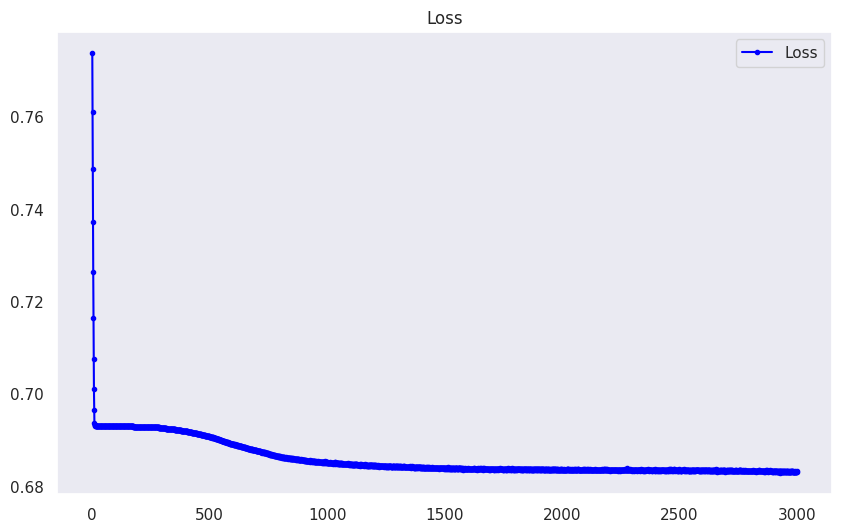

In [25]:
loss=epoch_loss_list

plt.figure(1, figsize = (10, 6))
plt.title('Loss')

plt.plot(loss, marker='.', c = 'blue',label='Loss')

plt.legend(loc='upper right')
plt.grid()
plt.ylim()
plt.show()

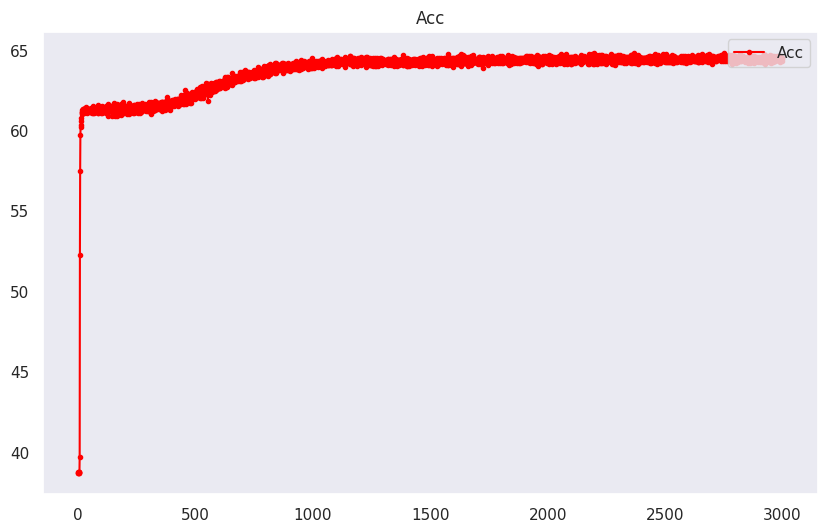

In [26]:
acc=epoch_acc_list

plt.figure(1, figsize = (10, 6))
plt.title('Acc')

plt.plot(acc, marker='.', c = 'red',label='Acc')

plt.legend(loc='upper right')
plt.grid()
plt.ylim()
plt.show()

# Test Acc

In [27]:
y_pred_list = []
model_layer_4.eval()

with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model_layer_4(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.extend(y_pred_tag.cpu().numpy().tolist())


s = 0
size = len(ts_y)
for i in range(size):
    if ( ts_y.iloc[i]["Potability"] == y_pred_list[i]): s+=1

test_accuracy1 = s/size
print(test_accuracy1)

0.6265243902439024


# Result

기존의 방식과 달랐던 점

**1. 신경망의 단순화**

: 3276개라는 데이터의 양이 많지 않다고 생각하였습니다. MLPClassifier(hidden_layer_sizes=1000, random_state=100)를 사용하였던 기존의 신경망에 비해 단순한 신경망을 사용하였습니다.

**2. Loss 함수의 변화**

: MSELoss를 사용하지 않고 BCEWithLogitsLoss( )를 사용하였습니다.

**3. LR을 더 작게 만들기**

: 0.001 -> 0.0001



Differences from the conventional approach

**1. Simplification of the neural network**
: Considering the limited size of 3276 data points, a simpler neural network was chosen compared to the previous approach, which used MLPClassifier(hidden_layer_sizes=1000, random_state=100).

**2. Change in the loss function:**
: Instead of using MSELoss, BCEWithLogitsLoss() was employed.

**3. Reducing the learning rate:**
: The learning rate was decreased from 0.001 to 0.0001."




与传统方法的不同之处

**1. 对神经网络的简化**
考虑到3276个数据点的有限规模，相比于先前采用的MLPClassifier(hidden_layer_sizes=1000, random_state=100)的神经网络，选择了一个更简单的神经网络。

**2. 损失函数的变化**
不再使用MSELoss，而是采用BCEWithLogitsLoss()。

3. 减小学习率：
学习率从0.001减小到0.0001。

MSELoss를 사용하면 Loss는 낮지만 불안정하게 학습되었음

Using MSELoss results in a low loss but unstable training.

使用 MSELoss 会导致损失降低，但训练不稳定。

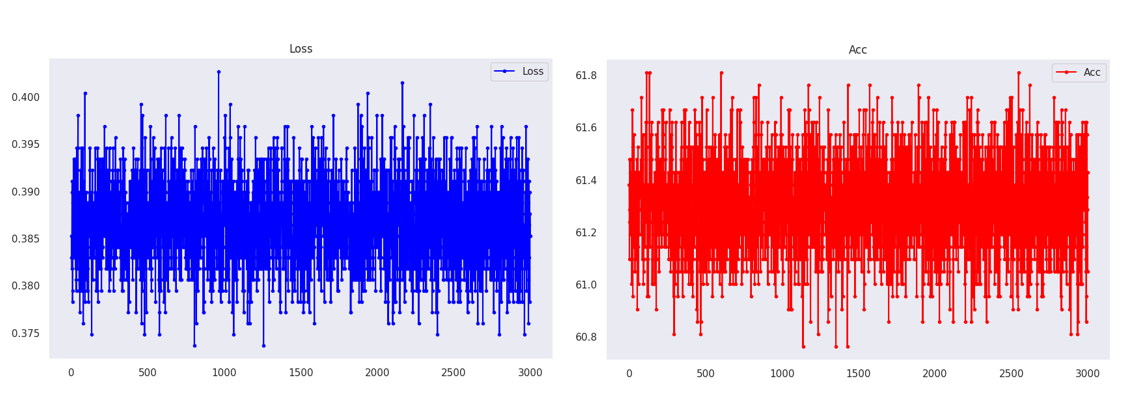

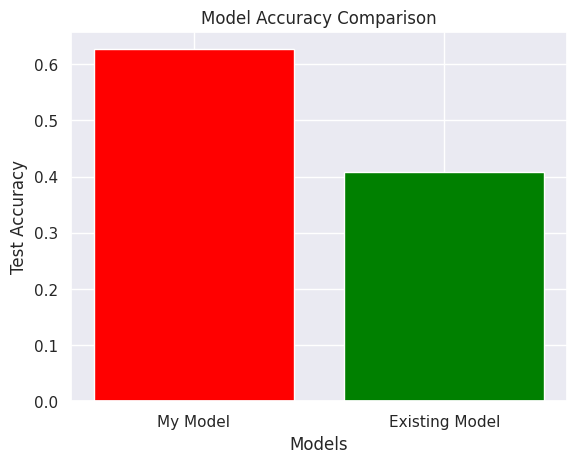

In [44]:
labels = ['My Model', 'Existing Model']
accuracies = [test_accuracy1,0.408]

plt.bar(labels, accuracies, color=['red', 'green'])

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')

plt.show()

**Accuracy 21.85%  ↑**

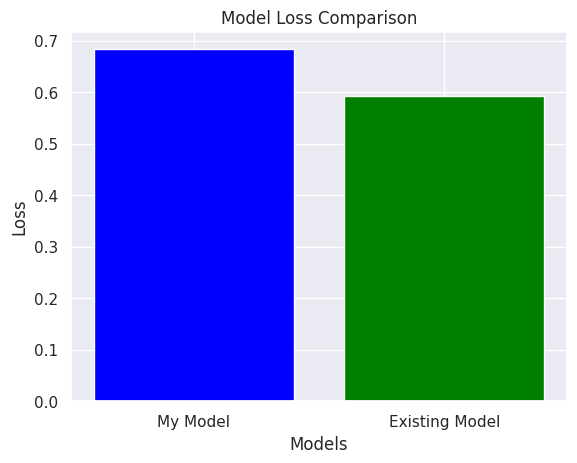

In [68]:
labels = ['My Model', 'Existing Model']
accuracies = [0.68360,0.592]

plt.bar(labels, accuracies, color=[ 'blue','green'])

plt.title('Model Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')

plt.show()

**Loss 9.1% ↑**

Loss 를 낮추기 위한 방법으로 크게 4가지를 생각하였습니다.

- Batch size 늘리기 : 256로 두었을 때 loss = 0.69315로 오히려 현재 Loss보다 높은 값이 나왔습니다.
- LR 바꿔보기 : Adam Optimizer에서 0.01,0.001,0.0001 세가지의 LR로 실험해본 결과 0.0001이 가장 좋은 Acc,Loss결과가 나왔습니다.
- Optimizer 바꾸기
 - SGD)
Loss : 0.69315
Acc: 59.988
 - Adagrad)
Loss : 0.7022
Acc: 61.281
 - Adam)
Loss : 0.68306
Acc: 64.494
- 불균형한 Data를 균형있는 Data로 바꾸기 : Loss는 줄었지만 Acc가 같이 줄어드는 결과가 나와 그냥 원래 모델을 사용하였습니다.

To reduce the loss, I considered three main approaches

- Increasing Batch Size: When set to 256, the loss unexpectedly increased to 0.69315, higher than the current loss.

- Trying Different Learning Rates (LR) in Adam Optimizer
LR = 0.01: Loss = 0.7022, Acc = 61.281
LR = 0.001: Loss = 0.68306, Acc = 64.494
LR = 0.0001: Best results with Loss = 0.68306 and Acc = 64.494.
- Changing Optimizers:
 - SGD) Loss = 0.69315, Acc = 59.988
 - Adagrad) Loss = 0.7022, Acc = 61.281
 - Adam) Best results with Loss = 0.68306 and Acc = 64.494.
- Attempting to balance the imbalanced data led to a decrease in loss, but the accuracy also decreased. Therefore, I decided to stick with the original model.

为了降低损失，我考虑了三种主要方法

- 增大批处理大小：设置为256时，损失意外地增加到0.69315，高于当前损失。

- 尝试在Adam Optimizer中使用不同的学习率（LR）：

LR = 0.01：损失 = 0.7022，准确率 = 61.281
LR = 0.001：损失 = 0.68306，准确率 = 64.494
LR = 0.0001：最佳结果是损失 = 0.68306 和准确率 = 64.494。
- 更改优化器：

 - SGD：损失 = 0.69315，准确率 = 59.988
 - Adagrad：损失 = 0.7022，准确率 = 61.281
 - Adam：损失 = 0.68306 和准确率 = 64.494 的最佳结果。
- 试图平衡不均衡的数据导致损失减少，但准确率也减少。因此，我决定坚持使用原始模型。

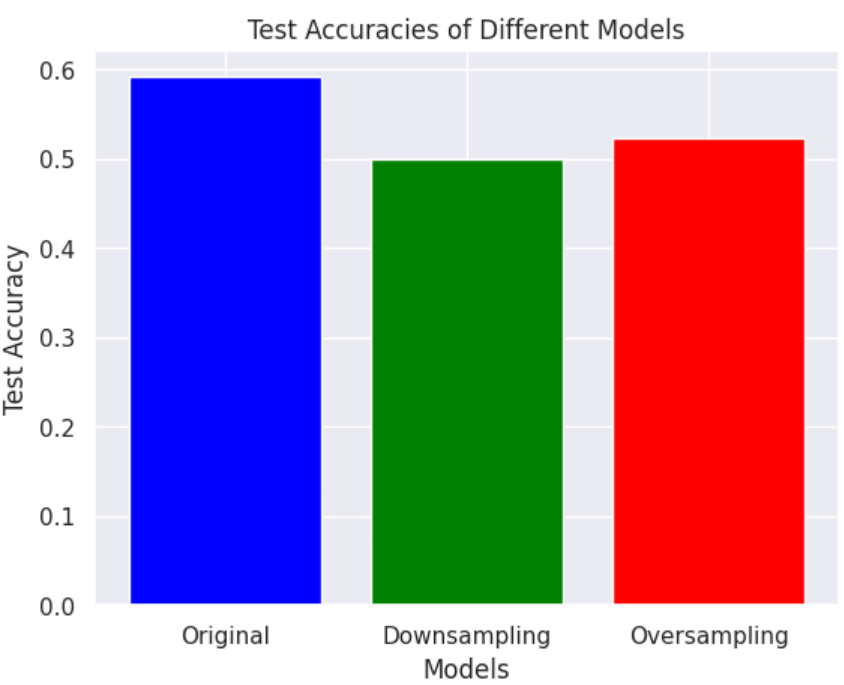